In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
df["Category"].fillna("Na",inplace=True)

In [7]:
df["Type"].fillna("Na",inplace=True)

In [8]:
df["Genres"].fillna("Na",inplace=True)

In [9]:
df["Current Ver"].fillna("Na",inplace=True)

In [10]:
df["Android Ver"].fillna("Na",inplace=True)

In [11]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

In [12]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
df["Price"]=df["Price"].str.replace("$","").astype("float")

In [14]:
df.shape

(10840, 13)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(10357, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Rating', ylabel='Category'>

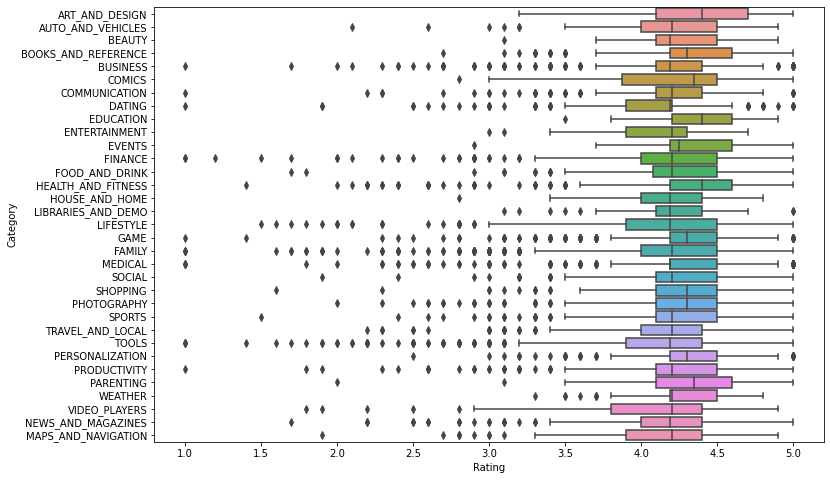

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Rating",y="Category")

#### Most of the Ratings are in between 3.5 to 4.5 for each category

### Free Vs Paid app

In [19]:
df["Type"].value_counts()

Free    9591
Paid     765
Na         1
Name: Type, dtype: int64

In [20]:
x=[10040,800]
y=["Free","Paid"]

([<matplotlib.patches.Wedge at 0x292f62c5610>,
 [Text(-1.070566794830964, 0.2527582596184673, 'Free'),
  Text(1.0705667889147297, -0.2527582846768919, 'Paid')],
 [Text(-0.5839455244532531, 0.13786814161007305, '92.6%'),
  Text(0.5839455212262161, -0.13786815527830465, '7.4%')])

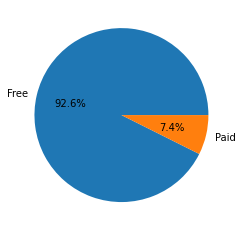

In [21]:
plt.pie(x,labels=y,autopct='%1.1f%%')

#### User prefer free version rather than paid & only 7.4% user used paid service

<AxesSubplot:>

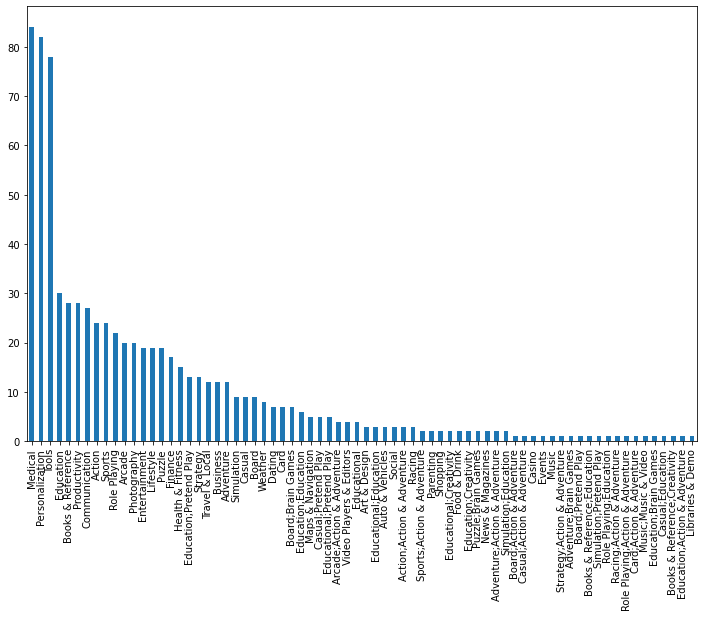

In [22]:
plt.figure(figsize=(12,8))
df[df["Type"]=="Paid"]["Genres"].value_counts().plot(kind="bar")

#### Medical field users used paid version most
If bring more app related to medical then there is chance to increase paid type

### Maximum installated App

In [23]:
df["Installs"].max()

'500,000,000+'

In [24]:
df[df["Installs"]=="500,000,000+"]["App"].value_counts()

Candy Crush Saga                                      5
Temple Run 2                                          5
Snapchat                                              4
Pou                                                   4
Viber Messenger                                       4
Microsoft Word                                        3
Dropbox                                               3
Google Calendar                                       3
MX Player                                             3
My Talking Tom                                        3
Gboard - the Google Keyboard                          3
LINE: Free Calls & Messages                           2
SHAREit - Transfer & Share                            2
Flipboard: News For Our Time                          2
Facebook Lite                                         2
Google Translate                                      2
Twitter                                               2
UC Browser - Fast Download Private & Secure     

In [25]:
df[df["Installs"]=="500,000,000+"]["Category"].value_counts()

GAME                  14
COMMUNICATION         11
PRODUCTIVITY          10
TOOLS                  9
SOCIAL                 6
NEWS_AND_MAGAZINES     4
FAMILY                 3
VIDEO_PLAYERS          3
HEALTH_AND_FITNESS     1
Name: Category, dtype: int64

#### Maximum installed app categories are game and communication
If new version or updation bring on this category then installation number will increase

### Least installed App

In [26]:
df["Installs"].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [27]:
df[(df["Installs"]=='0+')&(df["Installs"]<'1+')]["App"].count()

14

In [28]:
df[(df["Installs"]=='0+')&(df["Installs"]<'1+')]["App"].value_counts()

CX Network                                      1
Eu sou Rico                                     1
Test Application DT 02                          1
Pekalongan CJ                                   1
Ak Parti Yardım Toplama                         1
I'm Rich/Eu sou Rico/أنا غني/我很有錢               1
Popsicle Launcher for Android P 9.0 launcher    1
AP Series Solution Pro                          1
cronometra-br                                   1
Sweden Newspapers                               1
EP Cook Book                                    1
Eu Sou Rico                                     1
EG | Explore Folegandros                        1
Ain Arabic Kids Alif Ba ta                      1
Name: App, dtype: int64

#### 14 apps installed less

### Pricey App

In [29]:
df["Price"].max()

400.0

In [30]:
df[df["Price"]==400.0]["App"]

4367    I'm Rich - Trump Edition
Name: App, dtype: object

In [31]:
df[df["Price"]==400.0]["Installs"]

4367    10,000+
Name: Installs, dtype: object

In [32]:
df[df["Price"]==400.0]["Rating"]

4367    3.6
Name: Rating, dtype: float64

#### I'm Rich - Trump Edition App has most pricey and 10,000+ user installled it but rating for this app is average 
If app developer work on app as per user rating then rating and installation of this app can be increse

### Lowest rated Apps

In [33]:
df["Rating"].min()

1.0

In [34]:
df[df["Rating"]==1.0]["App"]

625                               House party - live chat
4127                                    Speech Therapy: F
5151                                        Clarksburg AH
5978                        Truck Driving Test Class 3 BC
6319                     BJ Bridge Standard American 2018
6490                                               MbH BM
7144                                        CB Mobile Biz
7383                                       Thistletown CI
7427                                       CJ DVD Rentals
7806                                          CR Magazine
7926                                 Tech CU Card Manager
8820                                       DS Creator 2.0
8875                                       DT future1 cam
10324                      FE Mechanical Engineering Prep
10400             Familial Hypercholesterolaemia Handbook
10590    Lottery Ticket Checker - Florida Results & Lotto
Name: App, dtype: object

In [35]:
df[df["Rating"]==1.0]["App"].count()

16

#### 16 Apps rated low 
App maker need to work on rating and make it as per user requirement so they can increse there app rating

## Conclusion:
    1)Average rating of each category app has in between 3.5 to 4 star
    2)92.6% user use free app and only 7.4% user used paid app
    3)The most paid apps used by users are in the medical category.
    4)Maximum apps installed from the game and communication categories.
    5)14 apps has been installed less.
    6)The costliest app is "I'm Rich - Trump Edition",this has been installed by 10K+ user.However,the app has an average
    rating
    7)There are 16 apps which have received only 1 star rating

## Result:
    1)User prefer free app rather than paid.But most paid version belong to the medical category.However,this does indicate
    that medical apps can be more paying to the developer.
    2)The most installed apps are in games and communication category.If more and more apps are launched and the apps will 
    update constantly in this category then more user will install app.
    3)"I'm Rich - Trump Edition" App has most pricey and 10,000+ user installled it but rating for this app is average.
    So app developer work on app as per user reviews then rating and installation of this app can be increse.
    4)There are 16 apps received low(1 star) rating so app delevoper need to work on app as per user reviews that can help 
    to get good ratings and increase installation number.

## Thank You...